# KNN을 활용한 분류(다진) 문제

```bash
iris 데이터 분류
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_wine, load_iris

# 사이키런에서 사용되는 가장 중요한 기능
from sklearn.model_selection import train_test_split


In [3]:
iris = load_iris()


# 로드 아이리스를 통해서 데이터를 가져오면 무조건 딕셔너리다. 중괄호를 보면 알 수 있음.
# 딕셔너리를 보면 바로 해라.
iris.keys() # 키
iris.values() # 값
iris.items() # 키, 값 전체

dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [4]:
# iris 데이터를 판다스 데이터 프레임으로 변경해보라.

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 이것은 X임
print(df.head())

df["target"] = iris.target
df

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#카운트 분포 알아보기! (외워야 함.)
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

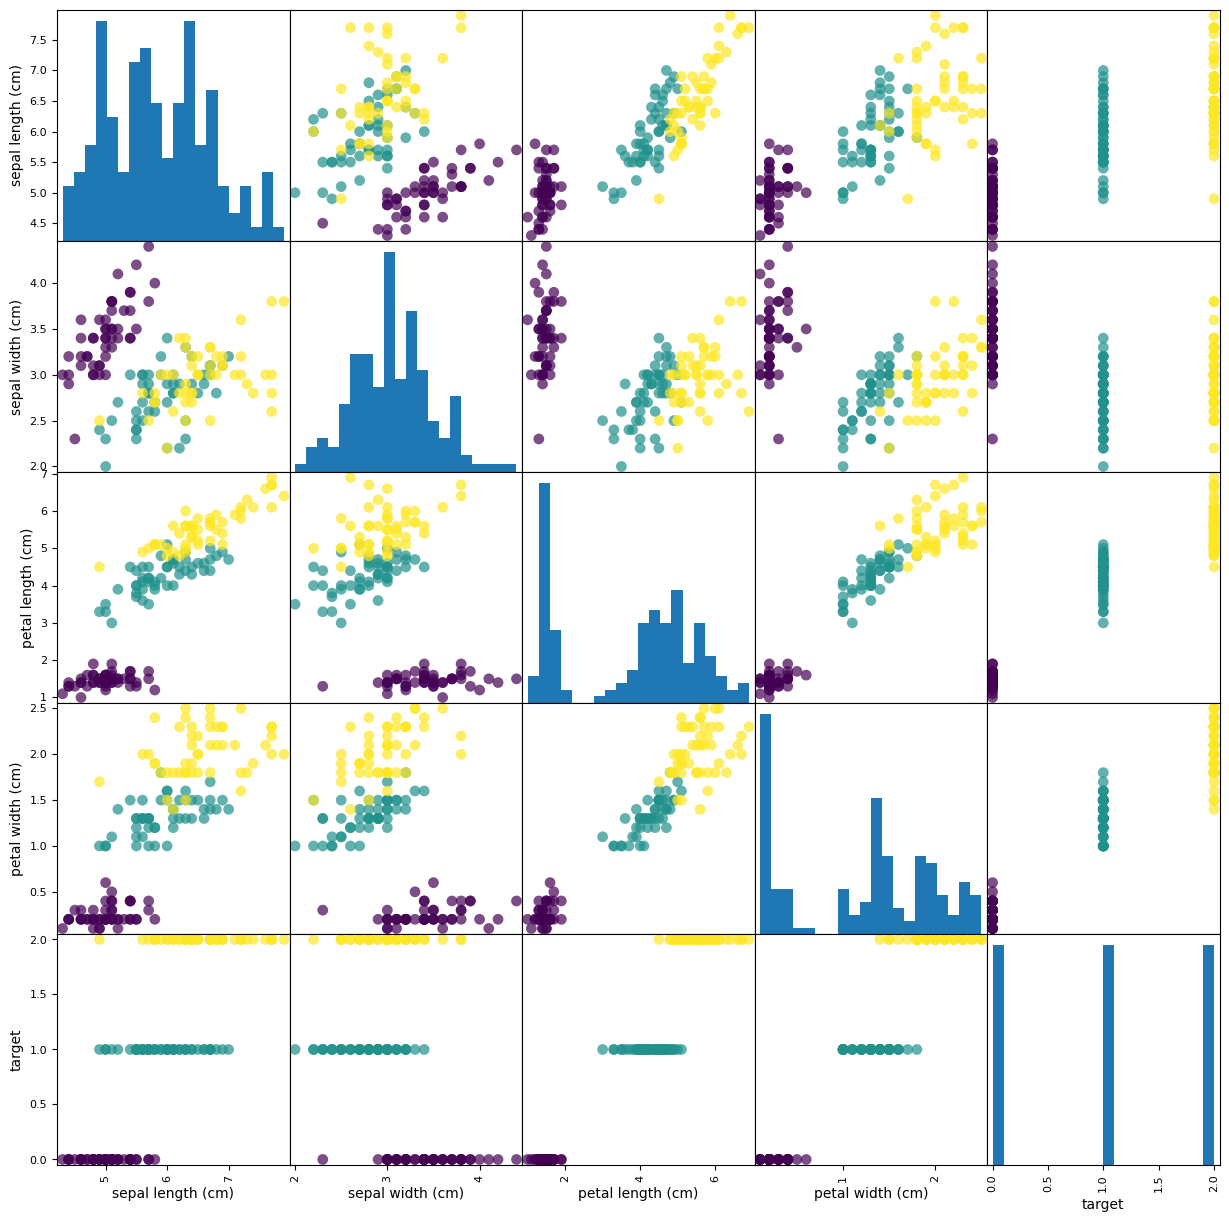

In [7]:
pd.plotting.scatter_matrix(
    df,
    c=df['target'], 
    figsize=(15, 15),
    marker='o',
    hist_kwds={"bins" : 20},
    s=60,
    alpha=0.7
)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], random_state=42)

# [112 rows x 4 columns] -> 검증용
# 렌덤 값을 동일하게 고정해야 같은 문제에 같은 답안을 가지고 성능 테스트가 가능함. 배포시에는 지움

In [9]:
#데이터 분류 작업
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [10]:
#KNN 모델을 가져와서 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

knn = RidgeClassifier()
knn.fit(X_train, y_train)

RidgeClassifier()

In [11]:
#얼마나 정확한지 확인
y_pred = knn.predict(X_test)
print(np.mean(y_pred == y_test))
print(knn.score(X_test, y_test))

0.868421052631579
0.868421052631579
